### Project Title : Hospital Patient Flow Analysis & Readmission Risk Prediction

##### Name: Khushi Mishra
##### Roll No. : 2201321650025


### Imported Necessary Libraries

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.ensemble import IsolationForest
import warnings
warnings.filterwarnings('ignore')

### Load Dataset

In [8]:
df = pd.read_csv("hospital.csv")

## <u> # Descriptive Analysis

### Extract Initial Information 

In [365]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

### From the information , we found that this is the hospital dataset 
##### 1. There are 101765 rows  and 50 columns in the dataset
##### 2. There are 13 columns of numeric type and 37 columns of Catagorical type
##### 3. There is missing values in 2 columns   max_glu_serum and A1Cresult column  

In [366]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


##### . We can see that Age column is in range 
##### . In weight column we can see that the question mark in weight column 
##### . In Readmitted column There is Three thing NO is representing That the patient does not readmitted, >30 is representing that the patient readmitted after 30 days and <30 is representing the patient readmitted before 30 day


In [319]:
df.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


##### From statistic information of the dataset we found that
###### 1. Maximum number_inpatient is 21%, number_outpatient is 42%, time_in_hospital is 14 hour, num_lab_procedure is 132 and num_procedure is 6
###### 2. The maximum no. of days patient stay or admitted in Hospital is 14 days and Minimum is 1 day.


### <u>Data Preprocessing 

In [367]:
# Less than 50% non null value so it will not be usefull in analsis
df.drop(columns='max_glu_serum',inplace=True, axis=1) 
df.drop(columns='A1Cresult',inplace=True, axis=1)

In [369]:
df = df.replace("?", pd.NA) #Replace the question mark by Null 

In [370]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 48 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      99493 non-null   object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    3197 non-null    object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                61510 non-null   object
 11  medical_specialty         51817 non-null   object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

##### # now we can see that we have deleted those two columns
##### # After replacing question mark with null value in weight col we can see that the weight column is containing 3197 nol null values so we will also drop it 

In [371]:
df.drop(columns='weight',inplace=True, axis=1) 

#### Checking for unique values race and gender column

In [372]:
unique_values = df['race'].unique()
print(f"Unique values in column 'race': {unique_values}")
unique_values = df['gender'].unique()
print(f"Unique values in column 'gender': {unique_values}")

Unique values in column 'race': ['Caucasian' 'AfricanAmerican' <NA> 'Other' 'Asian' 'Hispanic']
Unique values in column 'gender': ['Female' 'Male' 'Unknown/Invalid']


In [373]:
print(df["gender"].value_counts())

gender
Female             54708
Male               47055
Unknown/Invalid        3
Name: count, dtype: int64


In [374]:
df_dropped = df.dropna(subset=['gender']) # Drop that row in which there is null values in gender column

In [375]:
print(df["race"].value_counts())

race
Caucasian          76099
AfricanAmerican    19210
Hispanic            2037
Other               1506
Asian                641
Name: count, dtype: int64


In [376]:
df['race'].isnull().sum() 

2273

##### In race column there is 2273 null values

In [ ]:
df['race'] = df['race'].fillna('Other') #Replaced null values of race column with other 

In [378]:
unique_values = df['readmitted'].unique()
print(f"Unique values in column 'readmitted': {unique_values}")


Unique values in column 'readmitted': ['NO' '>30' '<30']


In [379]:
print(df["readmitted"].value_counts())

readmitted
NO     54864
>30    35545
<30    11357
Name: count, dtype: int64


In [380]:
df['readmitted'] = df['readmitted'].replace({'>30': 1, '<30': 1, 'NO': 0})

##### we replaced No with 0 , <30 & >30 with 1, because it represents the patient readmitted or not 

In [381]:
print(df["payer_code"].value_counts())

payer_code
MC    32439
HM     6274
SP     5007
BC     4655
MD     3532
CP     2533
UN     2448
CM     1937
OG     1033
PO      592
DM      549
CH      146
WC      135
OT       95
MP       79
SI       55
FR        1
Name: count, dtype: int64


In [382]:
df['payer_code'].isnull().sum() # checking null values

40256

##### there are 40256 null values in payer_code column

In [383]:
df['payer_code'] = df['payer_code'].fillna('unknown')

In [384]:
df['diag_1'].isnull().sum()


21

In [385]:
df['diag_2'].isnull().sum()

358

In [386]:
df['diag_3'].isnull().sum()

1423

In [387]:
replace_1 = df['diag_1'].mode()[0]
df['diag_1'] = df['diag_1'].fillna(replace_1)

replace_2 = df['diag_2'].mode()[0]
df['diag_2'] = df['diag_1'].fillna(replace_2)

replace_3 = df['diag_3'].mode()[0]
df['diag_3'] = df['diag_3'].fillna(replace_3)


##### we filled the null of payer_code with unknown and the values of diag_1,diag_2,diag_3 with mode 

In [388]:
print(df["medical_specialty"].value_counts())

medical_specialty
InternalMedicine                    14635
Emergency/Trauma                     7565
Family/GeneralPractice               7440
Cardiology                           5352
Surgery-General                      3099
                                    ...  
Perinatology                            1
Neurophysiology                         1
Psychiatry-Addictive                    1
Pediatrics-InfectiousDiseases           1
Surgery-PlasticwithinHeadandNeck        1
Name: count, Length: 72, dtype: int64


In [389]:
df['medical_specialty'].isnull().sum()

49949

In [390]:
df['medical_specialty'] = df['medical_specialty'].fillna('unknown')

##### There are 49949 null values in the medical_specialty column, replaced with unknown 

In [391]:
def convert_age(age_range):
    age_range = age_range.strip("[]()")   # remove brackets
    low, high = age_range.split('-')      # split by "-"
    return (int(low) + int(high)) // 2    # midpoint

# Apply conversion
df['age_numeric'] = df['age'].apply(convert_age)

In [392]:
df = df.drop(['encounter_id','patient_nbr','age'], axis=1) # drop encounter_id, patient_nbr (patient number) also age column because we created a new column as age_numeric 

In [393]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 45 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   race                      101766 non-null  object
 1   gender                    101766 non-null  object
 2   admission_type_id         101766 non-null  int64 
 3   discharge_disposition_id  101766 non-null  int64 
 4   admission_source_id       101766 non-null  int64 
 5   time_in_hospital          101766 non-null  int64 
 6   payer_code                101766 non-null  object
 7   medical_specialty         101766 non-null  object
 8   num_lab_procedures        101766 non-null  int64 
 9   num_procedures            101766 non-null  int64 
 10  num_medications           101766 non-null  int64 
 11  number_outpatient         101766 non-null  int64 
 12  number_emergency          101766 non-null  int64 
 13  number_inpatient          101766 non-null  int64 
 14  diag

### Now we can see that we have 44 column now

In [412]:
df[df.columns[:20]].head(50)

,race,gender,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,metformin,repaglinide
0,Caucasian,Female,6,25,1,1,unknown,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,250.83,250,1,No,No
1,Caucasian,Female,1,1,7,3,unknown,unknown,59,0,18,0,0,0,276,276,255,9,No,No
2,AfricanAmerican,Female,1,1,7,2,unknown,unknown,11,5,13,2,0,1,648,648,V27,6,No,No
3,Caucasian,Male,1,1,7,2,unknown,unknown,44,1,16,0,0,0,8,8,403,7,No,No
4,Caucasian,Male,1,1,7,1,unknown,unknown,51,0,8,0,0,0,197,197,250,5,No,No
5,Caucasian,Male,2,1,2,3,unknown,unknown,31,6,16,0,0,0,414,414,250,9,No,No
6,Caucasian,Male,3,1,2,4,unknown,unknown,70,1,21,0,0,0,414,414,V45,7,Steady,No
7,Caucasian,Male,1,1,7,5,unknown,unknown,73,0,12,0,0,0,428,428,250,8,No,No
8,Caucasian,Female,2,1,4,13,unknown,unknown,68,2,28,0,0,0,398,398,38,8,No,No
9,Caucasian,Female,3,3,4,12,unknown,InternalMedicine,33,3,18,0,0,0,434,434,486,8,No,No


In [404]:
df[df.columns[20:40]].head(50)

,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone
0,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No
1,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No
2,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No
3,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No
4,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No
5,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No
6,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No
7,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No
8,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No
9,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Steady,No,No,No,No


In [405]:
df[df.columns[40:46]].head(50)

,metformin-pioglitazone,change,diabetesMed,readmitted,age_numeric
0,No,No,No,0,5
1,No,Ch,Yes,1,15
2,No,No,Yes,0,25
3,No,Ch,Yes,0,35
4,No,Ch,Yes,0,45
5,No,No,Yes,1,55
6,No,Ch,Yes,0,65
7,No,No,Yes,1,75
8,No,Ch,Yes,0,85
9,No,Ch,Yes,0,95


In [413]:
unique_values = df['metformin'].unique() #checking for Unique values 
print(f"Unique values in column 'metformin': {unique_values}")

Unique values in column 'metformin': ['No' 'Steady' 'Up' 'Down']


In [414]:
unique_values = df['diabetesMed'].unique()
print(f"Unique values in column 'diabetesMed': {unique_values}")

Unique values in column 'diabetesMed': ['No' 'Yes']


In [415]:
catagorical_cols = df.select_dtypes(include=['object']).columns #only select column which have object datatype

#### #Label Encoding of all the categorical column

In [416]:
encoder = LabelEncoder()
for col in catagorical_cols:
    df[col] = encoder.fit_transform(df[col].astype(str))

In [423]:
df.head()

,race,gender,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,age_numeric
0,2,0,6,25,1,1,17,37,41,0,...,1,1,0,0,0,0,1,0,0,5
1,2,0,1,1,7,3,17,72,59,0,...,3,1,0,0,0,0,0,1,1,15
2,0,0,1,1,7,2,17,72,11,5,...,1,1,0,0,0,0,1,1,0,25
3,2,1,1,1,7,2,17,72,44,1,...,3,1,0,0,0,0,0,1,0,35
4,2,1,1,1,7,1,17,72,51,0,...,2,1,0,0,0,0,0,1,0,45


#### Now we can see that from head that all the values of categorical column are converted into numeric form

In [418]:
print(df["insulin"].value_counts())

insulin
1    47383
2    30849
0    12218
3    11316
Name: count, dtype: int64


#### # Feature Scaling 

In [422]:
 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)


In [352]:
#5. Anomaly Detection (Isolation Forest)

iso = IsolationForest(contamination=0.02, random_state=42)  # 2% anomalies
df['Anomaly'] = iso.fit_predict(X_scaled)

print("Total anomalies detected:", (df['Anomaly'] == -1).sum())

Total anomalies detected: 2036


In [353]:
# 6. Clustering (KMeans)
# -----------------------
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)

print(df[['Anomaly','Cluster']].head())


   Anomaly  Cluster
0       -1        0
1        1        1
2        1        0
3        1        1
4        1        1


###  Correlation Matrix to identify the Relationship between the features

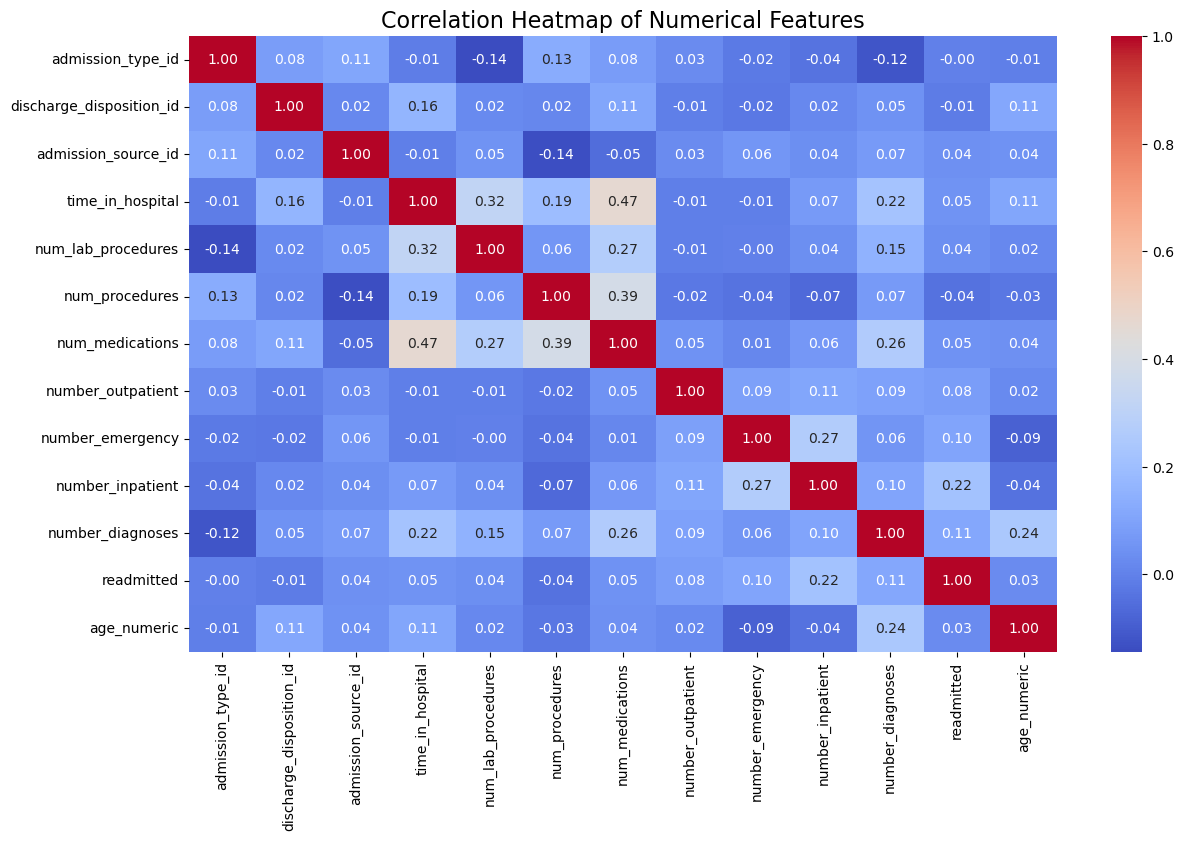

In [420]:
num_cols = df.select_dtypes(include=['int64', 'float64'])
corr = num_cols.corr()
plt.figure(figsize=(14,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap of Numerical Features", fontsize=16)
plt.show()


##### We can see that there is not any feature Highly correlated with Target Feature
##### num_procedure, admission_type_id , discharge_disposition_id are negatively collinear with target column Readmitted


### CountPlot 

In [2]:
sns.countplot(x='readmitted', data=df)
plt.title("Readmission Distribution")
plt.show()

NameError: name 'sns' is not defined

##### No. of Readmission of patient is less than no. of people who does not readmitted.
##### 0 represents no. of people who does not readmitted and 1 represent the patient who readmitted 

### CountPlot

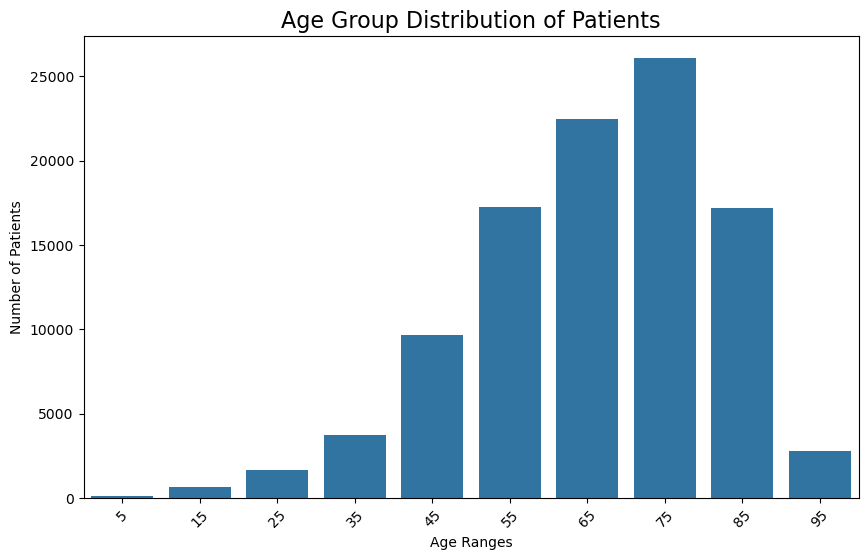

In [76]:
plt.figure(figsize=(10,6))
sns.countplot(x='age_numeric', data=df, order=sorted(df['age_numeric'].unique()))
plt.title("Age Group Distribution of Patients", fontsize=16)
plt.xlabel("Age Ranges")
plt.ylabel("Number of Patients")
plt.xticks(rotation=45)
plt.show()

##### # From the graph we can see that the maximum patient of Age group 55 to 85

### <u>#CountPlot Chart

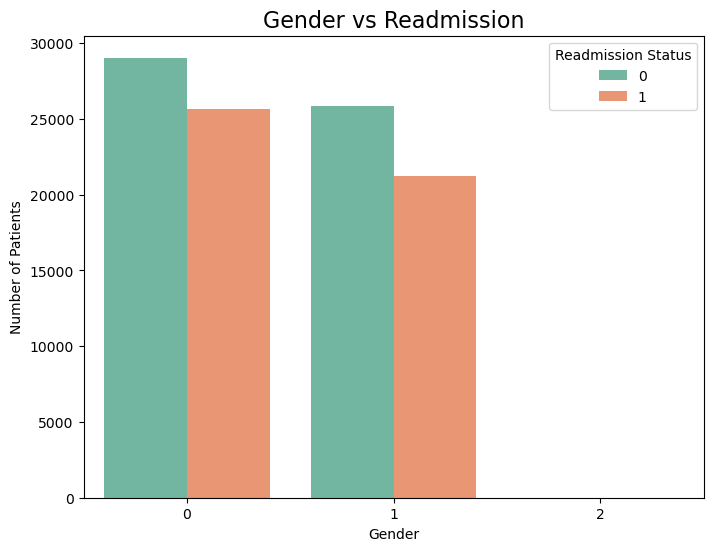

In [77]:
plt.figure(figsize=(8,6))
sns.countplot(x='gender', hue='readmitted', data=df, palette="Set2")
plt.title("Gender vs Readmission", fontsize=16)
plt.xlabel("Gender")
plt.ylabel("Number of Patients")
plt.legend(title="Readmission Status")
plt.show()

##### From the chart we can see that the Female Patient are more as compare to  Male patients
##### And in both the readmission rate is less than the non readmission rate

### <u>#BoxPlot

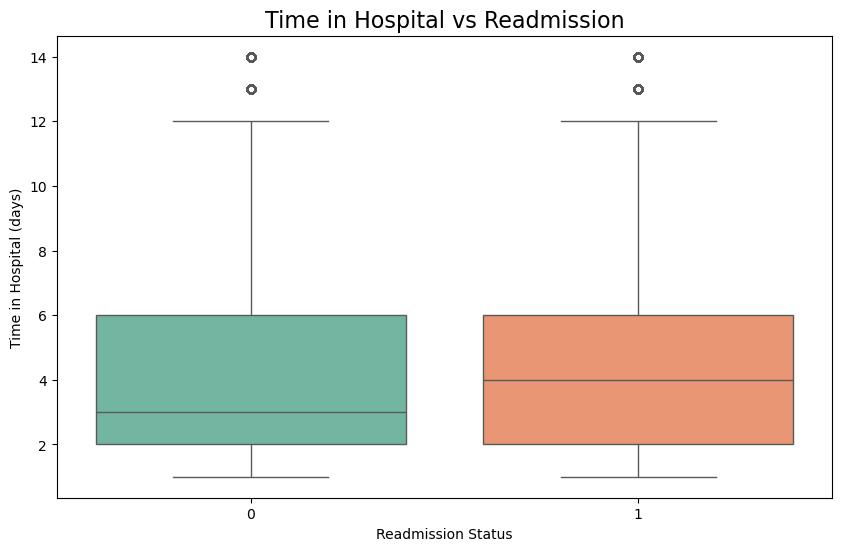

In [80]:
plt.figure(figsize=(10,6))
sns.boxplot(x='readmitted', y='time_in_hospital', data=df, palette="Set2")
plt.title("Time in Hospital vs Readmission", fontsize=16)
plt.xlabel("Readmission Status")
plt.ylabel("Time in Hospital (days)")
plt.show()

##### Now we can see that there is 2 outlier in Readmission Status

### <u># ViolinPlot Chart

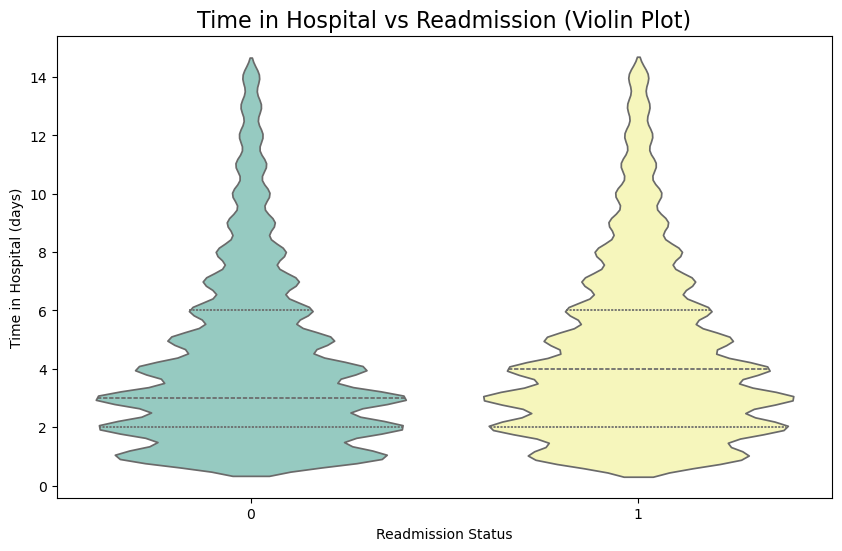

In [81]:
plt.figure(figsize=(10,6))
sns.violinplot(x='readmitted', y='time_in_hospital', data=df, palette="Set3", inner="quartile")
plt.title("Time in Hospital vs Readmission (Violin Plot)", fontsize=16)
plt.xlabel("Readmission Status")
plt.ylabel("Time in Hospital (days)")
plt.show()

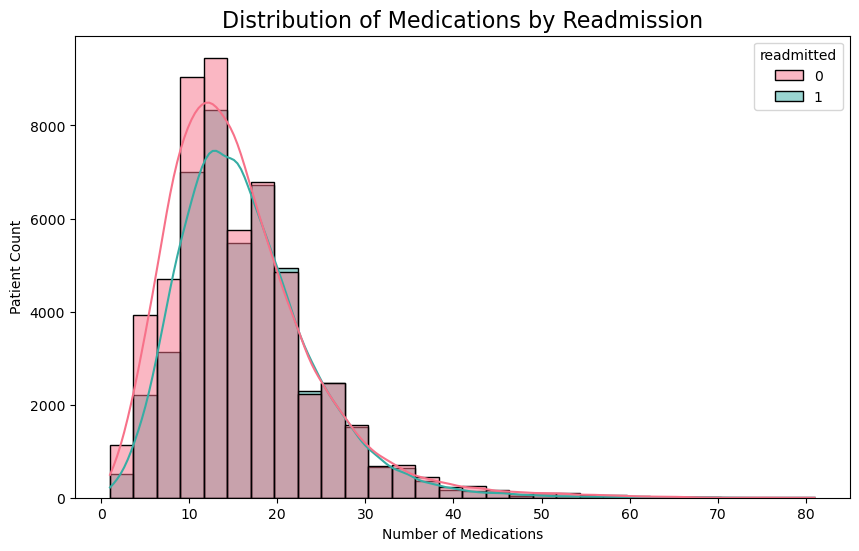

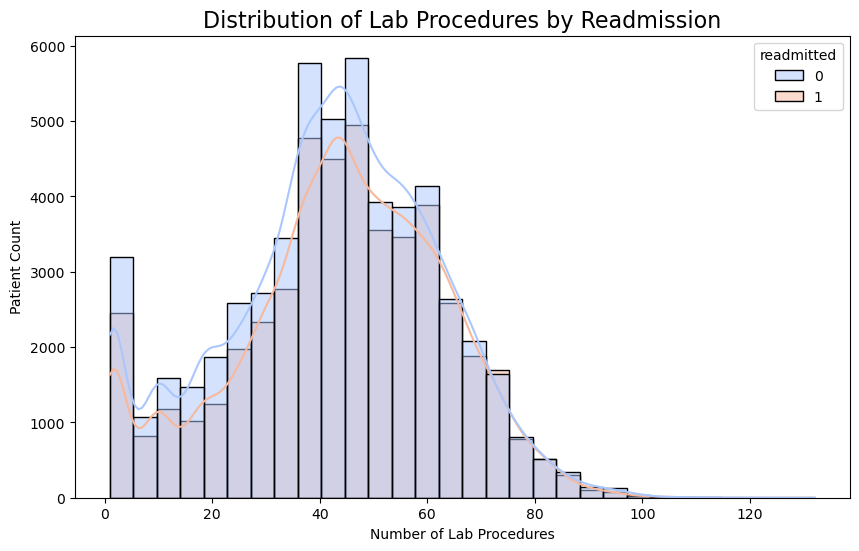

In [82]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='num_medications', hue='readmitted', bins=30, kde=True, palette="husl")
plt.title("Distribution of Medications by Readmission", fontsize=16)
plt.xlabel("Number of Medications")
plt.ylabel("Patient Count")
plt.show()

plt.figure(figsize=(10,6))
sns.histplot(data=df, x='num_lab_procedures', hue='readmitted', bins=30, kde=True, palette="coolwarm")
plt.title("Distribution of Lab Procedures by Readmission", fontsize=16)
plt.xlabel("Number of Lab Procedures")
plt.ylabel("Patient Count")
plt.show()

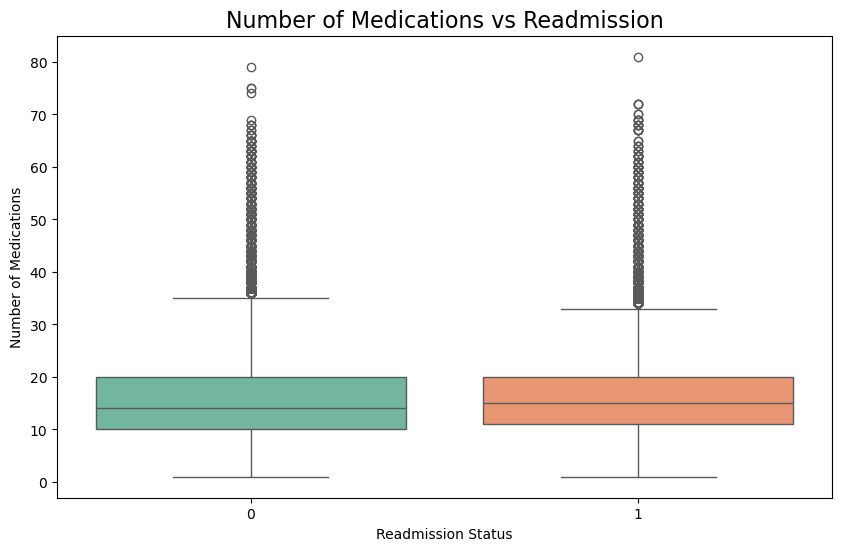

In [83]:
plt.figure(figsize=(10,6))
sns.boxplot(x='readmitted', y='num_medications', data=df, palette="Set2")
plt.title("Number of Medications vs Readmission", fontsize=16)
plt.xlabel("Readmission Status")
plt.ylabel("Number of Medications")
plt.show()

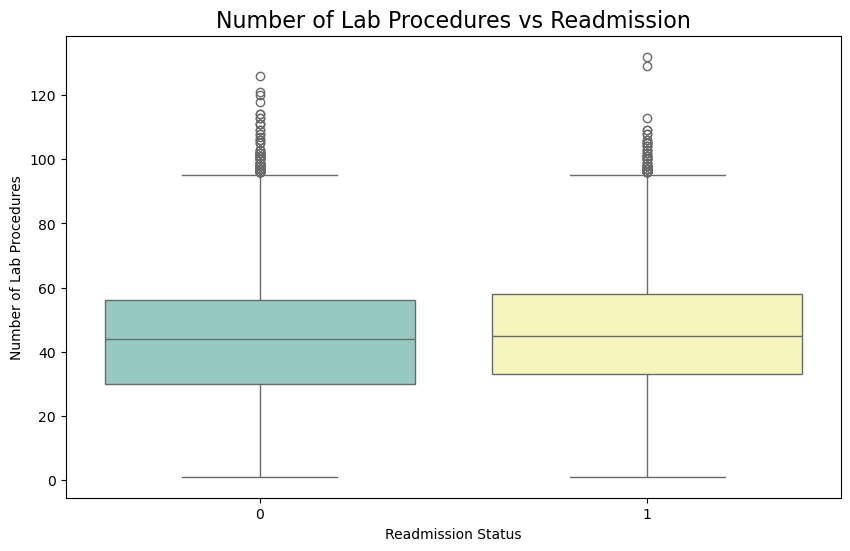

In [84]:
plt.figure(figsize=(10,6))
sns.boxplot(x='readmitted', y='num_lab_procedures', data=df, palette="Set3")
plt.title("Number of Lab Procedures vs Readmission", fontsize=16)
plt.xlabel("Readmission Status")
plt.ylabel("Number of Lab Procedures")
plt.show()

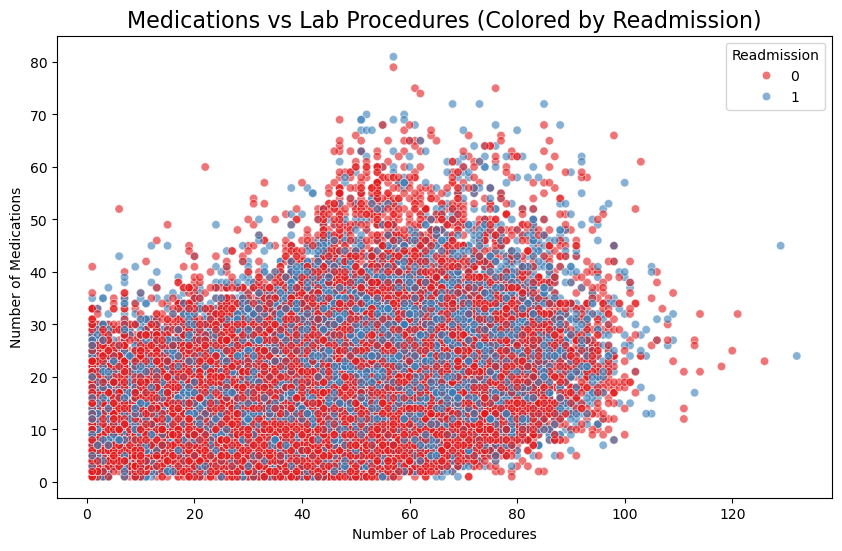

In [85]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df, 
    x='num_lab_procedures', 
    y='num_medications', 
    hue='readmitted', 
    alpha=0.6, 
    palette="Set1"
)
plt.title("Medications vs Lab Procedures (Colored by Readmission)", fontsize=16)
plt.xlabel("Number of Lab Procedures")
plt.ylabel("Number of Medications")
plt.legend(title="Readmission")
plt.show()

In [431]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 45 columns):
 #   Column                    Non-Null Count   Dtype
---  ------                    --------------   -----
 0   race                      101766 non-null  int32
 1   gender                    101766 non-null  int32
 2   admission_type_id         101766 non-null  int64
 3   discharge_disposition_id  101766 non-null  int64
 4   admission_source_id       101766 non-null  int64
 5   time_in_hospital          101766 non-null  int64
 6   payer_code                101766 non-null  int32
 7   medical_specialty         101766 non-null  int32
 8   num_lab_procedures        101766 non-null  int64
 9   num_procedures            101766 non-null  int64
 10  num_medications           101766 non-null  int64
 11  number_outpatient         101766 non-null  int64
 12  number_emergency          101766 non-null  int64
 13  number_inpatient          101766 non-null  int64
 14  diag_1              

### Predictive Analysis

In [358]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


### Data Preparation and Train-Test-Split

In [449]:
x = df.drop(['readmitted', 'race', 'medical_specialty', 'payer_code','admission_type_id','discharge_disposition_id','num_procedures','admission_source_id'], axis=1)  # Features
y = df['readmitted']  # Target
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### Model Fitting

In [450]:
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [451]:
y_pred = model.predict(x_test)

In [452]:
y_pred

array([0, 0, 1, ..., 1, 0, 0], dtype=int64)

In [453]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,roc_auc_score

### Model Evaluation

In [454]:
accuracy_score(y_test,y_pred)

0.6149651174216371

In [455]:
confusion_matrix(y_test,y_pred)

array([[8946, 2006],
       [5831, 3571]], dtype=int64)

In [456]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.61      0.82      0.70     10952
           1       0.64      0.38      0.48      9402

    accuracy                           0.61     20354
   macro avg       0.62      0.60      0.59     20354
weighted avg       0.62      0.61      0.59     20354



##### The model is giving 61% accuracy

### KNN Classification Algorithm

In [457]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [458]:
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

In [459]:
from sklearn.neighbors import KNeighborsClassifier 

In [460]:
k=2
knn_model = KNeighborsClassifier(n_neighbors = k)
knn_model.fit(x_train_scaled,y_train)

KNeighborsClassifier(n_neighbors=2)

In [461]:
y_pred_knn=knn_model.predict(x_test_scaled)

### Model Evaluation

In [462]:
accuracy_score(y_test,y_pred)

0.6149651174216371

### Finding the value of K by Elbow method

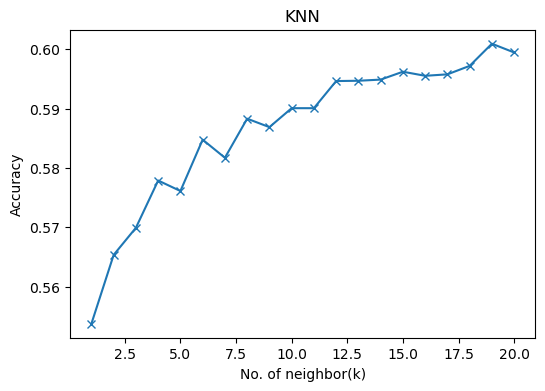

In [448]:
accuracy_scores = []
for i in range(1,21):
    model=KNeighborsClassifier(n_neighbors=i)
    model.fit(x_train_scaled,y_train)
    y_pred_i=model.predict(x_test_scaled)
    accuracy_scores.append(accuracy_score(y_test,y_pred_i))
    
plt.figure(figsize=(6,4))
plt.plot(range(1,21),accuracy_scores,marker='x')
plt.title("KNN")
plt.xlabel("No. of neighbor(k)")
plt.ylabel("Accuracy")
plt.show()


In [102]:
confusion_matrix(y_test,y_pred)

array([[8351, 2601],
       [5473, 3929]], dtype=int64)

In [103]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.60      0.76      0.67     10952
           1       0.60      0.42      0.49      9402

    accuracy                           0.60     20354
   macro avg       0.60      0.59      0.58     20354
weighted avg       0.60      0.60      0.59     20354



##### Using KNN classification the maodel is again giving 61% accuracy

### Naive Bayes Classification Algorithm

In [463]:
from sklearn.naive_bayes import GaussianNB

In [464]:
model_NB = GaussianNB() 

### Model Fitting

In [465]:
model_NB.fit(x_train,y_train)

GaussianNB()

In [466]:
y_pred_NB = model_NB.predict(x_test)

In [467]:
y_pred_NB

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [468]:
y_test

35956    0
60927    0
79920    0
50078    1
44080    1
        ..
16156    1
67386    1
81342    1
72915    1
41510    0
Name: readmitted, Length: 20354, dtype: int64

### Model Evaluation

In [469]:
accuracy_score(y_test,y_pred_NB)

0.589957747862828

In [470]:
confusion_matrix(y_test,y_pred_NB)

array([[9944, 1008],
       [7338, 2064]], dtype=int64)

In [471]:
print(classification_report(y_test,y_pred_NB))

              precision    recall  f1-score   support

           0       0.58      0.91      0.70     10952
           1       0.67      0.22      0.33      9402

    accuracy                           0.59     20354
   macro avg       0.62      0.56      0.52     20354
weighted avg       0.62      0.59      0.53     20354



##### Using Naive Bayes Algo the Model is giving 58% accuracy

### Desion Tree Classification

In [472]:
from sklearn.tree import DecisionTreeClassifier

In [476]:
model_DT = DecisionTreeClassifier(random_state=42)

### Model Fitting

In [477]:
model_DT.fit(x_train_scaled,y_train)

DecisionTreeClassifier(random_state=42)

In [478]:
y_pred_DT=model_DT.predict(x_test_scaled)

In [479]:
y_pred_DT

array([0, 0, 1, ..., 1, 0, 0], dtype=int64)

### Model Evaluation

In [480]:
accuracy_score(y_test,y_pred_DT)

0.5432347450132652

In [481]:
print(classification_report(y_test,y_pred_DT))

              precision    recall  f1-score   support

           0       0.57      0.58      0.58     10952
           1       0.51      0.50      0.50      9402

    accuracy                           0.54     20354
   macro avg       0.54      0.54      0.54     20354
weighted avg       0.54      0.54      0.54     20354



In [482]:
confusion_matrix(y_test,y_pred_DT)

array([[6387, 4565],
       [4732, 4670]], dtype=int64)

In [483]:
from sklearn.svm import SVC

#### Model Fitting

In [484]:
model_svm = SVC(kernel='rbf') 

In [485]:
model_svm.fit(x_train_scaled,y_train)

SVC()

In [109]:
y_pred_svc = model_svm.predict(x_test_scaled)

### Model Evaluation

In [110]:
accuracy_score(y_test,y_pred_svc)

0.6290655399430087

In [111]:
print(classification_report(y_test,y_pred_svc))

              precision    recall  f1-score   support

           0       0.63      0.77      0.69     10952
           1       0.64      0.46      0.54      9402

    accuracy                           0.63     20354
   macro avg       0.63      0.62      0.61     20354
weighted avg       0.63      0.63      0.62     20354



In [112]:
from sklearn.ensemble import RandomForestClassifier

In [115]:
clf = RandomForestClassifier(
    n_estimators=300,
    max_depth=20,
    class_weight="balanced",  # it will hande imbalance
    n_jobs=-1,
    random_state=42
)
clf.fit(x_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=20, n_estimators=300,
                       n_jobs=-1, random_state=42)

In [120]:
# 4. Evaluate Model
# -------------------------
y_pred = clf.predict(x_test)
y_proba = clf.predict_proba(x_test)[:, 1]

In [121]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba))

Confusion Matrix:
 [[7758 3194]
 [4044 5358]]

Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.71      0.68     10952
           1       0.63      0.57      0.60      9402

    accuracy                           0.64     20354
   macro avg       0.64      0.64      0.64     20354
weighted avg       0.64      0.64      0.64     20354

ROC-AUC Score: 0.703202990629257


In [119]:
accuracy_score(y_test,y_pred_svc)

0.6290655399430087